In [340]:
import csv
import pickle
import matplotlib as plt
import keras 
import numpy as np
import pandas as pd
import sklearn

In [341]:
## read csv
chart = pd.read_csv("FOREX.csv")
chart.head(10)

,Unnamed: 0,Time Serie,AUSTRALIA - AUSTRALIAN DOLLAR/US$,EURO AREA - EURO/US$,NEW ZEALAND - NEW ZELAND DOLLAR/US$,UNITED KINGDOM - UNITED KINGDOM POUND/US$,BRAZIL - REAL/US$,CANADA - CANADIAN DOLLAR/US$,CHINA - YUAN/US$,HONG KONG - HONG KONG DOLLAR/US$,...,SINGAPORE - SINGAPORE DOLLAR/US$,DENMARK - DANISH KRONE/US$,JAPAN - YEN/US$,MALAYSIA - RINGGIT/US$,NORWAY - NORWEGIAN KRONE/US$,SWEDEN - KRONA/US$,SRI LANKA - SRI LANKAN RUPEE/US$,SWITZERLAND - FRANC/US$,TAIWAN - NEW TAIWAN DOLLAR/US$,THAILAND - BAHT/US$
0,0,2000-01-03,1.5172,0.9847,1.9033,0.6146,1.805,1.4465,8.2798,7.7765,...,1.6563,7.329,101.7,3.8,7.964,8.443,72.3,1.5808,31.38,36.97
1,1,2000-01-04,1.5239,0.97,1.9238,0.6109,1.8405,1.4518,8.2799,7.7775,...,1.6535,7.218,103.09,3.8,7.934,8.36,72.65,1.5565,30.6,37.13
2,2,2000-01-05,1.5267,0.9676,1.9339,0.6092,1.856,1.4518,8.2798,7.778,...,1.656,7.208,103.77,3.8,7.935,8.353,72.95,1.5526,30.8,37.1
3,3,2000-01-06,1.5291,0.9686,1.9436,0.607,1.84,1.4571,8.2797,7.7785,...,1.6655,7.2125,105.19,3.8,7.94,8.3675,72.95,1.554,31.75,37.62
4,4,2000-01-07,1.5272,0.9714,1.938,0.6104,1.831,1.4505,8.2794,7.7783,...,1.6625,7.2285,105.17,3.8,7.966,8.415,73.15,1.5623,30.85,37.3
5,5,2000-01-10,1.5242,0.9754,1.935,0.6107,1.819,1.4568,8.2794,7.7785,...,1.6618,7.254,105.28,3.8,8.024,8.449,73.3,1.5704,30.83,37.27
6,6,2000-01-11,1.5209,0.9688,1.9365,0.6068,1.8225,1.457,8.2795,7.7785,...,1.669,7.214,106.09,3.8,7.969,8.397,73.35,1.5605,30.83,37.61
7,7,2000-01-12,1.5202,0.9727,1.9286,0.6073,1.835,1.455,8.2796,7.7787,...,1.669,7.236,105.76,3.8,7.977,8.418,73.35,1.566,30.8,37.54
8,8,2000-01-13,1.4954,0.9737,1.9084,0.6067,1.814,1.4495,8.2798,7.7788,...,1.67,7.252,106.09,3.8,7.9425,8.417,73.35,1.5707,30.8,37.49
9,9,2000-01-14,1.5004,0.9874,1.9186,0.6115,1.805,1.4497,8.2797,7.7789,...,1.6752,7.347,105.86,3.8,7.997,8.474,73.35,1.5945,30.83,37.55


In [342]:
## select right columns for the graph
def Currency_selection(country):
    ls= list(chart)
    ls.remove("Time Serie")
    ls.remove(country)
    #print(ls)
    return ls

In [343]:
## data preprocessing. Set the chosen column to NATION
NATION = "AUSTRALIA - AUSTRALIAN DOLLAR/US$" 
col = Currency_selection(NATION)
Cur = chart.drop(columns=col)
Cur = Cur[Cur[NATION] != 'ND']

name_ls = NATION.split('-')
country_name = name_ls[0]
ex_type =  country_name 
Cur = Cur.rename(columns={'Time Serie': 'Date', NATION : ex_type})
#print(Cur)

In [344]:
## int - float
Cur[ex_type] = Cur[ex_type].astype(float)

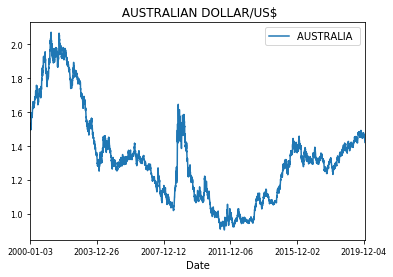

In [345]:
Cur.plot(kind = "line", x = "Date",y = ex_type,title = name_ls[1],fontsize = 8)